In [11]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address to lat  and long values
 
# folium - map rendering 
import os
import folium 

# Matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [12]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_falfel_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [13]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = ' '# my Foursquare ID 
    CLIENT_SECRET =' ' # Foursquare Secret 
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [14]:
def get_venue_details(venue_id):
        
    CLIENT_ID = ' '# Foursquare ID 
    CLIENT_SECRET =' ' # Foursquare Secret 
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [15]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [16]:
new_york_data=get_new_york_data()

In [17]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [18]:
new_york_data.shape

(306, 4)

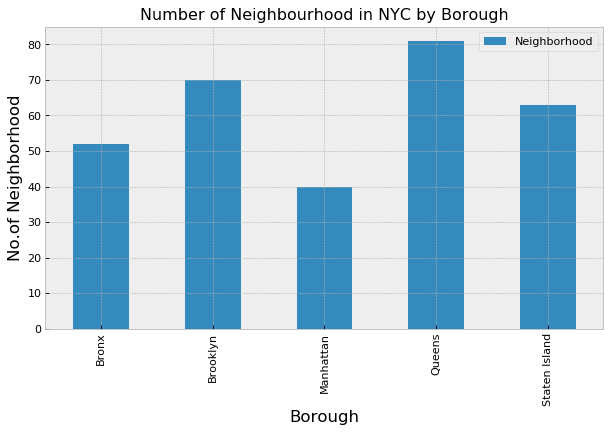

In [19]:
from matplotlib import pyplot as plt
plt.style.use('bmh')
 
 
plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

In [20]:
# Neighborhood list that contains Falafel restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
falafel_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    falafel_resturants=venues[venues['Category']=='Falafel Restaurant']   
    print('(',count,'/',len(new_york_data),')','Falafel Restaurant located at '+Neighborhood+', '+Borough+':'+str(len(falafel_resturants)))
    for resturant_detail in falafel_resturants.values.tolist():
        id, name , category=resturant_detail
        falafel_rest_ny = falafel_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Falafel Restaurant located at Wakefield, Bronx:0
( 2 / 306 ) Falafel Restaurant located at Co-op City, Bronx:0
( 3 / 306 ) Falafel Restaurant located at Eastchester, Bronx:0
( 4 / 306 ) Falafel Restaurant located at Fieldston, Bronx:0
( 5 / 306 ) Falafel Restaurant located at Riverdale, Bronx:0
( 6 / 306 ) Falafel Restaurant located at Kingsbridge, Bronx:0
( 7 / 306 ) Falafel Restaurant located at Marble Hill, Manhattan:0
( 8 / 306 ) Falafel Restaurant located at Woodlawn, Bronx:0
( 9 / 306 ) Falafel Restaurant located at Norwood, Bronx:0
( 10 / 306 ) Falafel Restaurant located at Williamsbridge, Bronx:0
( 11 / 306 ) Falafel Restaurant located at Baychester, Bronx:0
( 12 / 306 ) Falafel Restaurant located at Pelham Parkway, Bronx:0
( 13 / 306 ) Falafel Restaurant located at City Island, Bronx:0
( 14 / 306 ) Falafel Restaurant located at Bedford Park, Bronx:0
( 15 / 306 ) Falafel Restaurant located at University Heights, Bronx:0
( 16 / 306 ) Falafel Restaurant located at Mor

In [21]:
falafel_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Brooklyn Heights,4a9c07d1f964a520ca3520e3,Heights Falafel
1,Brooklyn,Fort Greene,4ba76698f964a520ec9039e3,Damas Falafel House
2,Brooklyn,Clinton Hill,4ba76698f964a520ec9039e3,Damas Falafel House
3,Brooklyn,Prospect Lefferts Gardens,563d4d86cd10fc8927e55202,Kulushkat
4,Brooklyn,North Side,447a1926f964a520df331fe3,Oasis


In [22]:
falafel_rest_ny.shape

(25, 4)

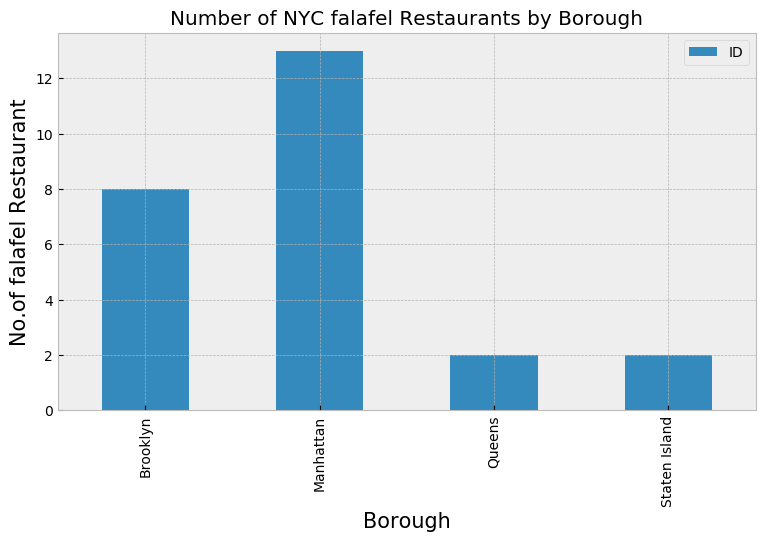

In [23]:
from matplotlib import pyplot as plt
plt.style.use('bmh')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of NYC falafel Restaurants by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of falafel Restaurant', fontsize=15)
#giving a bar plot
falafel_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()



In [24]:
#falafel_rest_ny[falafel_rest_ny['Neighborhood']=='Floral Park']

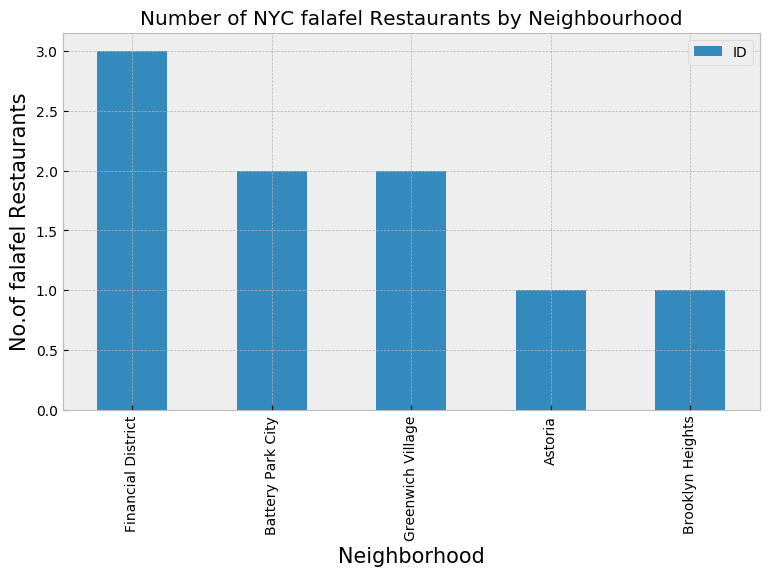

In [25]:
from matplotlib import pyplot as plt
plt.style.use('bmh')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of NYC falafel Restaurants by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of falafel Restaurants', fontsize=15)
#giving a bar plot
falafel_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [26]:
# prepare neighborhood list that contains falafel resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
falafel_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in falafel_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that as falafel resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
falafel_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in falafel_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # resturants as they may have been recently opened or details does not exist in FourSquare Databasewe will get 0 value
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(falafel_rest_ny),')','processed')
    falafel_rest_stats_ny = falafel_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID             Name  Likes  Rating  Tips
0  4a9c07d1f964a520ca3520e3  Heights Falafel     90     8.0    38
( 1 / 25 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4ba76698f964a520ec9039e3  Damas Falafel House     20     8.2     9
( 2 / 25 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4ba76698f964a520ec9039e3  Damas Falafel House     20     8.2     9
( 3 / 25 ) processed
                         ID       Name  Likes  Rating  Tips
0  563d4d86cd10fc8927e55202  Kulushkat     34     7.6    13
( 4 / 25 ) processed
                         ID   Name  Likes  Rating  Tips
0  447a1926f964a520df331fe3  Oasis    365     8.2   128
( 5 / 25 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4c0321db58dad13a6a094897  Pita off the Corner      9     7.2     8
( 6 / 25 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4d5f3846922960fc1

In [27]:
falafel_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Brooklyn Heights,4a9c07d1f964a520ca3520e3,Heights Falafel,90,8.0,38
1,Brooklyn,Fort Greene,4ba76698f964a520ec9039e3,Damas Falafel House,20,8.2,9
2,Brooklyn,Clinton Hill,4ba76698f964a520ec9039e3,Damas Falafel House,20,8.2,9
3,Brooklyn,Prospect Lefferts Gardens,563d4d86cd10fc8927e55202,Kulushkat,34,7.6,13
4,Brooklyn,North Side,447a1926f964a520df331fe3,Oasis,365,8.2,128


In [28]:
falafel_rest_stats_ny.shape

(25, 7)

In [29]:
falafel_rest_ny.shape

(25, 4)

In [30]:
falafel_rest_stats_ny.to_csv('falafel_rest_stats_ny.csv', index=False)

In [31]:
falafel_rest_stats_ny_csv=pd.read_csv('falafel_rest_stats_ny.csv')

In [32]:
falafel_rest_stats_ny_csv.shape

(25, 7)

In [33]:
falafel_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Brooklyn Heights,4a9c07d1f964a520ca3520e3,Heights Falafel,90,8.0,38
1,Brooklyn,Fort Greene,4ba76698f964a520ec9039e3,Damas Falafel House,20,8.2,9
2,Brooklyn,Clinton Hill,4ba76698f964a520ec9039e3,Damas Falafel House,20,8.2,9
3,Brooklyn,Prospect Lefferts Gardens,563d4d86cd10fc8927e55202,Kulushkat,34,7.6,13
4,Brooklyn,North Side,447a1926f964a520df331fe3,Oasis,365,8.2,128


In [34]:
falafel_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       25 non-null     object 
 1   Neighborhood  25 non-null     object 
 2   ID            25 non-null     object 
 3   Name          25 non-null     object 
 4   Likes         25 non-null     object 
 5   Rating        25 non-null     float64
 6   Tips          25 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.5+ KB


In [35]:
falafel_rest_stats_ny['Likes']=falafel_rest_stats_ny['Likes'].astype('float64')

In [36]:
falafel_rest_stats_ny['Tips']=falafel_rest_stats_ny['Tips'].astype('float64')

In [37]:
falafel_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       25 non-null     object 
 1   Neighborhood  25 non-null     object 
 2   ID            25 non-null     object 
 3   Name          25 non-null     object 
 4   Likes         25 non-null     float64
 5   Rating        25 non-null     float64
 6   Tips          25 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.5+ KB


In [38]:
# Restaurants with maximum Likes
falafel_rest_stats_ny.iloc[falafel_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              3fd66200f964a5202ee61ee3
Name                    Mamoun's Falafel
Likes                                976
Rating                               8.8
Tips                                 333
Name: 7, dtype: object

In [39]:
# Restaurants with maximum Rating
falafel_rest_stats_ny.iloc[falafel_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                West Village
ID              4a044315f964a520ea711fe3
Name                                Taïm
Likes                                801
Rating                               9.3
Tips                                 291
Name: 11, dtype: object

In [40]:
# Restaurants with maximum Tips
falafel_rest_stats_ny.iloc[falafel_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              3fd66200f964a5202ee61ee3
Name                    Mamoun's Falafel
Likes                                976
Rating                               8.8
Tips                                 333
Name: 7, dtype: object

In [41]:
ny_neighborhood_stats=falafel_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [42]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
20,West Village,9.30
11,Little Italy,9.10
17,Soho,9.10
10,Greenwich Village,8.95
3,Civic Center,8.50
1,Battery Park City,8.45
0,Astoria,8.40
6,Financial District,8.40
18,Turtle Bay,8.40
13,North Side,8.20


In [43]:
ny_borough_stats=falafel_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [44]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.584615
0,Brooklyn,7.925000
2,Queens,4.200000
3,Staten Island,0.000000


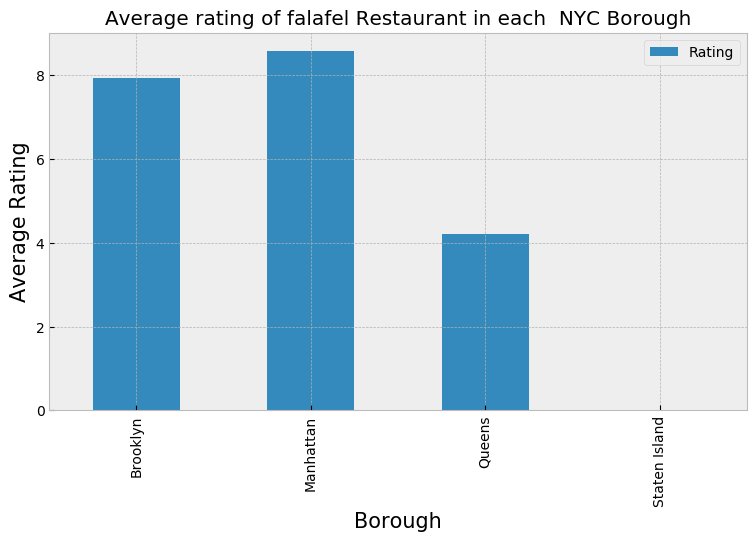

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of falafel Restaurant in each  NYC Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
falafel_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [46]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

In [47]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.40
1,Battery Park City,8.45
2,Brooklyn Heights,8.00
3,Civic Center,8.50
4,Clinton Hill,8.20
5,Dumbo,8.00
6,Financial District,8.40
7,Fort Greene,8.20
9,Fulton Ferry,8.00
10,Greenwich Village,8.95


In [48]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [49]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [50]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
14,Manhattan,West Village,40.734434,-74.006180,9.30
10,Manhattan,Little Italy,40.719324,-73.997305,9.10
12,Manhattan,Soho,40.722184,-74.000657,9.10
9,Manhattan,Greenwich Village,40.726933,-73.999914,8.95
3,Manhattan,Civic Center,40.715229,-74.005415,8.50
1,Manhattan,Battery Park City,40.711932,-74.016869,8.45
0,Queens,Astoria,40.768509,-73.915654,8.40
6,Manhattan,Financial District,40.707107,-74.010665,8.40
13,Manhattan,Turtle Bay,40.752042,-73.967708,8.40
4,Brooklyn,Clinton Hill,40.693229,-73.967843,8.20


In [51]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [52]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [53]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [54]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)